# **Import Library**

In [ ]:
!pip install google-play-scraper

In [ ]:
# Mengimpor pustaka google_play_scraper untuk mengakses ulasan dan informasi aplikasi dari Google Play Store.
from google_play_scraper import app, reviews, Sort, reviews_all

In [ ]:
#import library yg dibutuhkan

#untuk manipulasi dan analisis data
import pandas as pd
pd.options.mode.chained_assignment = None # Menonaktifkan peringatan chaining

#untuk komputasi numerik
import numpy as np
seed = 0
np.random.seed(seed) # Mengatur seed untuk reproduktibilitas

#untuk visualisasi data
import matplotlib.pyplot as plt

#untuk visualisasi data statistik dan mengatur gaya visualisasi
import seaborn as sns

from sklearn.metrics import accuracy_score

#manipulasi data waktu dan tanggal
import datetime as dt

#modul untuk bekerja dengan ekspresi reguler
import re

#berisi konstata string seperti tanda baca
import string

from nltk.tokenize import word_tokenize #tokenisasi teks
from nltk.corpus import stopwords #daftar kata kata berhenti dalam teks


!pip install sastrawi

#untuk stemming (penghilangan imbuhan) dalam bahasa indonesia
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

#menghapus kata kata berhenti dalam bahasa indonesia
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

#membuat visualisasi berbentuk awan kata dari teks
from wordcloud import WordCloud

#import pustaka NLTK toolkit (Natural Language Toolkit)
import nltk

#mengunduh dataset untuk tokenisasi
nltk.download('punkt')

nltk.download('punkt_tab')

#mengunduh daftar kata kata berhenti dalam bahasa indonesia
nltk.download('stopwords')

# Mengunduh resource 'wordnet' untuk analisis semantik
nltk.download('wordnet')

# mengunduh resource 'omw-1.4' untuk terjemahan multibahasa
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

# **Scraping Dataset**

In [ ]:
#import google_play_scrapper untuk mengakses ulasan aplikasi
from google_play_scraper import app, reviews_all, Sort

#untuk mengambil semua ulasan pada google play store dengan ID = com.miHoYo.GenshinImpact
scrapreview = reviews_all(
    'com.miHoYo.GenshinImpact', #id aplikasi
    lang='id', #bahasa ulasan
    country='id', #negara ulasan
    sort=Sort.MOST_RELEVANT, #urutan ulasan
    count=300000, #jumlah ulasan yang akan diambil
)

#Menyimpan ulasan dalam file csv
import csv

with open('hasil-scraping-data.csv', mode='w', newline='', encoding='utf-8') as file:
  writer = csv.writer(file)
  writer.writerow(['review']) #Menulis header kolom
  for review in scrapreview:
    writer.writerow([review['content']]) #menulis konten ulasan dalam file csv

app_reviews_df = pd.DataFrame(scrapreview)
app_reviews_df.shape
app_reviews_df.head()
app_reviews_df.to_csv('hasil-scraping-data.csv', index=False)

#Membuat dataframe dari hasil scrapeview
app_reviews_df = pd.DataFrame(scrapreview)

# Menghitung jumlah baris dan kolom dalam DataFrame
jumlah_ulasan, jumlah_kolom = app_reviews_df.shape

# Menampilkan lima baris pertama dari DataFrame app_reviews_df
app_reviews_df.head()

# Menampilkan informasi tentang DataFrame app_reviews_df
app_reviews_df.info()


# Menghitung jumlah baris dan kolom dalam DataFrame
jumlah_ulasan, jumlah_kolom = app_reviews_df.shape

# Menampilkan hasil
print(f"Jumlah ulasan: {jumlah_ulasan}")
print(f"Jumlah kolom: {jumlah_kolom}")

#Melakukan pembersihan pada DataFrame dengan menghapus baris yang memiliki nilai yang hilang (NaN)
clean_df = app_reviews_df.dropna()

#Menghapus baris yang duplikat
clean_df = clean_df.drop_duplicates()

#Menghitung jumlah baris dan kolom DataFrame setelah pembersihan
jumlah_ulasan_setelah_hapus_duplikat, jumlah_kolom_setelah_hapus_duplikat = clean_df.shape

clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54000 entries, 0 to 53999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   reviewId              54000 non-null  object        
 1   userName              54000 non-null  object        
 2   userImage             54000 non-null  object        
 3   content               54000 non-null  object        
 4   score                 54000 non-null  int64         
 5   thumbsUpCount         54000 non-null  int64         
 6   reviewCreatedVersion  35789 non-null  object        
 7   at                    54000 non-null  datetime64[ns]
 8   replyContent          4242 non-null   object        
 9   repliedAt             4242 non-null   datetime64[ns]
 10  appVersion            35789 non-null  object        
dtypes: datetime64[ns](2), int64(2), object(7)
memory usage: 4.5+ MB
Jumlah ulasan: 54000
Jumlah kolom: 11
<class 'pandas.core.frame.Data

# **Preprocessing Text**

Berikut adalah beberapa fungsi yang digunakan untuk membersihkan dan memproses teks. Inilah penjelasan singkat tentang masing-masing fungsi:

1. `cleaningText(text)`: Fungsi ini digunakan untuk membersihkan teks dengan beberapa langkah, seperti menghapus mention, hashtag, RT (retweet), tautan (link), angka, dan tanda baca. Selain itu, itu juga menggantikan karakter newline dengan spasi dan menghilangkan spasi ekstra di awal dan akhir teks.

2. `casefoldingText(text)`: Fungsi ini mengonversi semua karakter dalam teks menjadi huruf kecil (lowercase), sehingga teks menjadi lebih seragam.

3. `tokenizingText(text)`: Fungsi ini digunakan untuk membagi teks menjadi daftar kata atau token. Ini berguna untuk mengurai teks menjadi komponen-komponen dasar.

4. `filteringText(text)`: Fungsi ini digunakan untuk menghapus kata-kata berhenti (stopwords) dalam teks. Anda telah memperbarui daftar kata-kata berhenti dengan beberapa kata tambahan.

5. `stemmingText(text)`: Fungsi ini menerapkan stemming pada teks, yaitu mengurangi kata-kata menjadi bentuk dasarnya. Anda menggunakan pustaka Sastrawi untuk melakukan stemming dalam bahasa Indonesia.

6. `toSentence(list_words)`: Fungsi ini digunakan untuk menggabungkan daftar kata-kata menjadi sebuah kalimat.

Anda dapat menggunakan fungsi-fungsi ini dalam proyek Anda untuk membersihkan, memproses, dan mempersiapkan teks sebelum melakukan analisis sentimen. Pastikan untuk memanggil fungsi-fungsi ini dengan benar sesuai dengan tahap pemrosesan teks yang Anda inginkan.

In [ ]:
#Function untuk cleaningtext
def cleaningText(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) # menghapus mention
    text = re.sub(r'#[A-Za-z0-9]+', '', text) # menghapus hashtag
    text = re.sub(r'RT[\s]', '', text) # menghapus RT
    text = re.sub(r"http\S+", '', text) # menghapus link
    text = re.sub(r'[0-9]+', '', text) # menghapus angka
    text = re.sub(r'[^\w\s]', '', text) # menghapus karakter selain huruf dan angka

    text = text.replace('\n', ' ') # mengganti baris baru dengan spasi
    text = text.translate(str.maketrans('', '', string.punctuation)) # menghapus semua tanda baca
    text = text.strip(' ') # menghapus karakter spasi dari kiri dan kanan teks
    return text

In [ ]:
#Function untuk mengubah semua huruf menjadi huruf kecil (Lowercase)
def casefoldingText(text):
  text = text.lower()
  return text

#Function untuk memecah atau membagi string menjadi daftar token (kalimat menjadi teks satuan)
def tokenizingText(text):
  print(f"Input untuk tokenizing: {text}")
  text = word_tokenize(text)
  return text

In [ ]:
#Function untuk menghapus stopwords pada text
def filteringText(text):
    listStopwords = set(stopwords.words('indonesian'))
    listStopwords1 = set(stopwords.words('english'))
    listStopwords.update(listStopwords1)
    listStopwords.update(['iya','yaa','gak','nya','na','sih','ku',"di","ga","ya","gaa","loh","kah","woi","woii","woy"])
    filtered = []
    for txt in text:
        if txt not in listStopwords:
            filtered.append(txt)
    text = filtered
    return text

In [ ]:
#Function untuk mengubah kata ke bentuk dasarnya dengan cara menghilangkan imbuhan di depan dan belakang kata
def stemmingText(text):
    # Membuat objek stemmer
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()

    # Memecah teks menjadi daftar kata
    words = text.split()

    # Menerapkan stemming pada setiap kata dalam daftar
    stemmed_words = [stemmer.stem(word) for word in words]

    # Menggabungkan kata-kata yang telah distem
    stemmed_text = ' '.join(stemmed_words)

    return stemmed_text


#Function untuk mengubah daftar kata-kata menjadi kalimat
def toSentence(list_words):
  sentence = ' '.join(word for word in list_words)
  return sentence

In [ ]:
#untuk mengubah kata-kata INFORMAL menjadi FORMAL
slangwords = {"@": "di", "abis": "habis", "wtb": "beli", "masi": "masih", "wts": "jual", "wtt": "tukar", "bgt": "banget", "maks": "maksimal"}
def fix_slangwords(text):
    words = text.split()
    fixed_words = []

    for word in words:
        if word.lower() in slangwords:
            fixed_words.append(slangwords[word.lower()])
        else:
            fixed_words.append(word)

    fixed_text = ' '.join(fixed_words)
    return fixed_text

In [ ]:
#Penerapan seluruh fungsi yang telah dibuat
# Membersihkan teks dan menyimpannya di kolom 'text_clean'
clean_df['text_clean'] = clean_df['content'].apply(cleaningText)

# Mengubah huruf dalam teks menjadi huruf kecil dan menyimpannya di 'text_casefoldingText'
clean_df['text_casefoldingText'] = clean_df['text_clean'].apply(casefoldingText)

# Mengganti kata-kata slang dengan kata-kata standar dan menyimpannya di 'text_slangwords'
clean_df['text_slangwords'] = clean_df['text_casefoldingText'].apply(fix_slangwords)

# Memecah teks menjadi token (kata-kata) dan menyimpannya di 'text_tokenizingText'
clean_df['text_tokenizingText'] = clean_df['text_slangwords'].apply(tokenizingText)

# Menghapus kata-kata stop (kata-kata umum) dan menyimpannya di 'text_stopword'
clean_df['text_stopword'] = clean_df['text_tokenizingText'].apply(filteringText)

# Menggabungkan token-token menjadi kalimat dan menyimpannya di 'text_akhir'
clean_df['text_akhir'] = clean_df['text_stopword'].apply(toSentence)

Input untuk tokenizing: hallo kenapa samsung tablet s selalu close saat membuka applikasi genshin pdhl hari lalu saya masih bisa memainkannya dg lancar sampai dg versi terakhir yang tertampil di layar aplikasi ini ada bug dan harus hapus memori sdh sy coba kosongkan memori sampai giga tersediaram dan saya instal ulang tetap tidak bisa dimainkan hanya sampai halaman hoyoverse aja mohon diperbaiki baru saya ganti bintangnya thx tim pengembang
Input untuk tokenizing: suram sih ini game nyari arte buat char aja bulan lebih masih gadapet sekalinya nemu arte bagus pas di upgrade malah ampas sedangkan nemu yang stat bagus dari awal aja susah banget mending kalo charnya dikit ini kan banyak mau abyss juga mesti bawa char bagus baru bisa kelar
Input untuk tokenizing: ini sih game mmorpg terbaik sih menurutku aku kan suka game yg nge build sama buat formasi game nya tu bener cocok banget sama cerita nya g nge bosenin grafik juga ok cm klo bisa penyimpanan nya di hemat jangan update wilayah baru 

## Pelabelan

In [ ]:
import csv
import requests
from io import StringIO

#Untuk membaca data dari kata-kata positif yang ada di github
lexicon_positive = dict()

#mengirim permintaan HTTP untuk mendapatkan berkas CSV dari github
response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_positive.csv')

if response.status_code == 200:
  #skenario permintaan sukses
  reader = csv.reader(StringIO(response.text), delimiter=',') #membaca teks dengan pembaca file csv dan pemisah koma

  for row in reader:
    #Looping tiap baris pada file CSV
    lexicon_positive[row[0]] = int(row[1])
     # Menambahkan kata-kata positif dan skornya ke dalam kamus lexicon_positive
else:
  print("Failed to fetch positive lexicon data")

#Untuk membaca data dari kata-kata negatif yang ada di github
lexicon_negative = dict()

#Semua step sama kayak positive namun dibalik
response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_negative.csv')

if response.status_code == 200:
  render = csv.reader(StringIO(response.text), delimiter=',')

  for row in render:
    lexicon_negative[row[0]] = int(row[1])

else:
  print("Failed to fetch negative lexicon data")

In [ ]:
#Fungsi untuk menentukan polaritas sentimen dari rating aplikasi
def sentiment_analysis_lexicon_indonesia(text):
  score = 0

  for word in text:
    #mengulangi setiap kata dalam text
    if (word in lexicon_positive):
      score += lexicon_positive[word]
      #jika kata ada dalam kamus positif, maka tambahkan skor tersebut

  for word in text:
    if (word in lexicon_negative):
      score += lexicon_negative[word]
      #jika kata ada dalam kamus negatif, maka kurangi skor tersebut

  polarity = ''

  if (score > 0):
    polarity = 'positive'
  elif (score < 0):
    polarity = 'negative'
  else:
    polarity = 'neutral'
  #menentukan sentimen berdasarkan skor

  return score, polarity

In [ ]:
results = clean_df['text_stopword'].apply(sentiment_analysis_lexicon_indonesia)
results = list(zip(*results))
clean_df['polarity_score'] = results[0]
clean_df['polarity'] = results[1]
print(clean_df['polarity'].value_counts())

polarity
negative    1359
positive     781
neutral      253
Name: count, dtype: int64


## Visualisasi

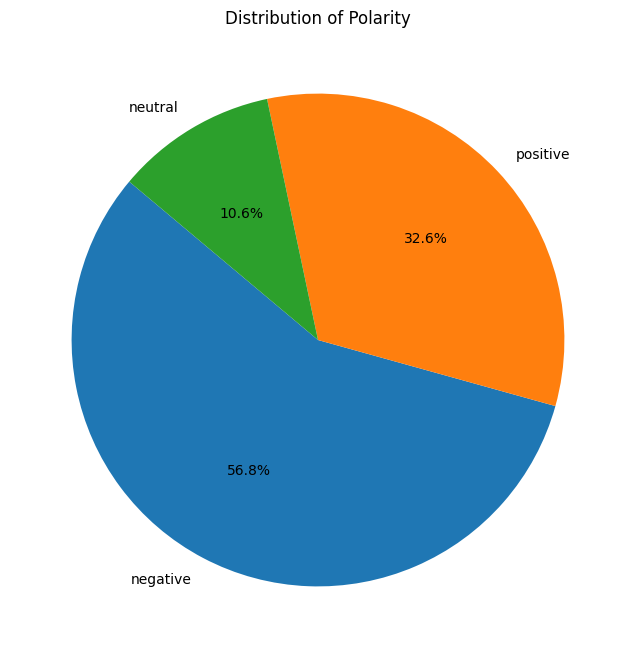

In [ ]:
import matplotlib.pyplot as plt

# Hitung jumlah masing-masing kategori polaritas
polarity_counts = clean_df['polarity'].value_counts()

# Menampilkan diagram lingkaran
plt.figure(figsize=(8, 8))
plt.pie(polarity_counts, labels=polarity_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Polarity')
plt.show()

## Word Cloud General

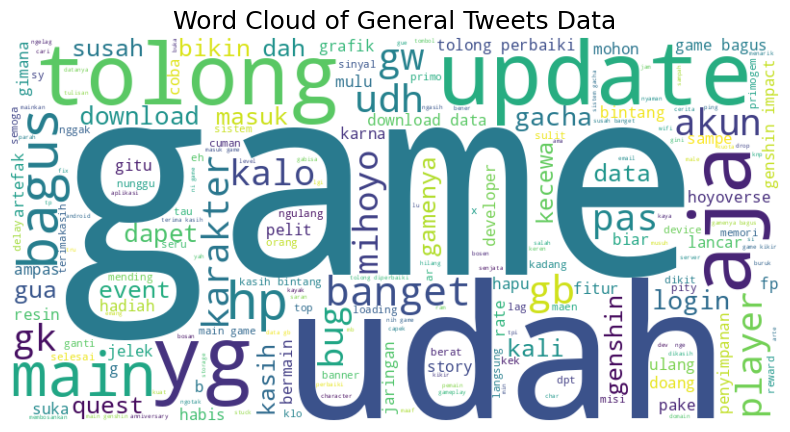

In [ ]:
#import
from wordcloud import WordCloud
import matplotlib.pyplot as plt

list_words = ''
for tweet in clean_df['text_stopword']:
  #Melakukan iterasi melalui setiap kata didalam tweet
  for word in tweet:
    list_words += ' ' + word

#membuat word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(list_words)

#Melakukan visualisasi word cloud
fig, ax = plt.subplots(figsize=(10, 5))
ax.set_title('Word Cloud of General Tweets Data', fontsize=18)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Tidak menampilkan sumbu
plt.show()

## Word CLoud Positive

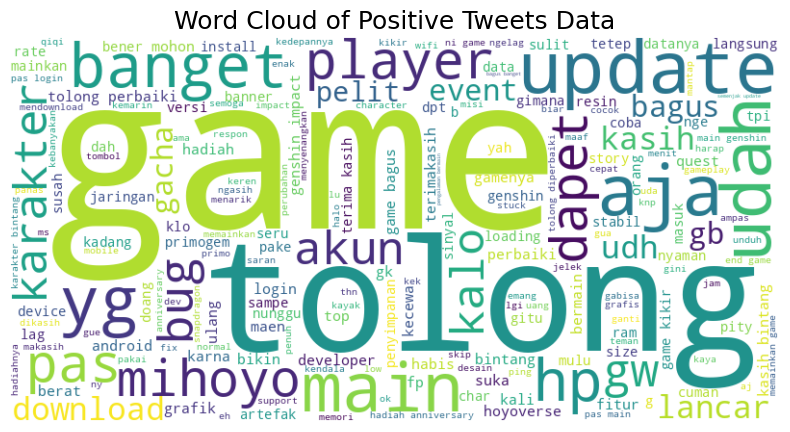

In [ ]:
pd.set_option('display.max_colwidth', 3000)

negative_tweets = clean_df[clean_df['polarity'] == 'negative']
negative_tweets = negative_tweets[['text_akhir', 'polarity_score', 'polarity','text_stopword']]
negative_tweets = negative_tweets.sort_values(by='polarity_score', ascending=False)
negative_tweets = negative_tweets.reset_index(drop=True)
negative_tweets.index += 1

# Filter teks hanya untuk polaritas 'positive'
positive_tweets = clean_df[clean_df['polarity'] == 'positive']['text_stopword']

# Gabungkan semua kata dari tweet positif ke dalam satu string
list_words = ''
for tweet in positive_tweets:
    for word in tweet:
        list_words += ' ' + word

# Membuat WordCloud khusus untuk teks positif
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis', max_words=200).generate(list_words)

# Visualisasi WordCloud
fig, ax = plt.subplots(figsize=(10, 5))
ax.set_title('Word Cloud of Positive Tweets Data', fontsize=18)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Tidak menampilkan sumbu
plt.show()

## Word Cloud Negative

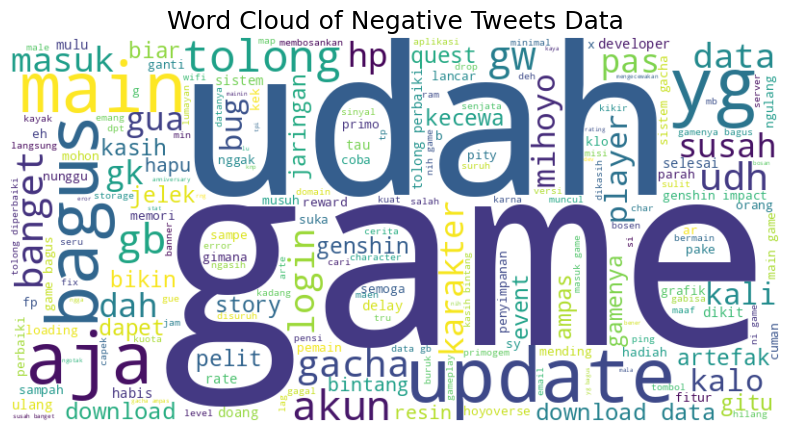

In [ ]:
# Filter teks hanya untuk polaritas 'positive'
negative_tweets = clean_df[clean_df['polarity'] == 'negative']['text_stopword']

# Gabungkan semua kata dari tweet positif ke dalam satu string
list_words = ''
for tweet in negative_tweets:
    for word in tweet:
        list_words += ' ' + word

# Membuat WordCloud khusus untuk teks positif
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis', max_words=200).generate(list_words)

# Visualisasi WordCloud
fig, ax = plt.subplots(figsize=(10, 5))
ax.set_title('Word Cloud of Negative Tweets Data', fontsize=18)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Tidak menampilkan sumbu
plt.show()

## Word Cloud Natural

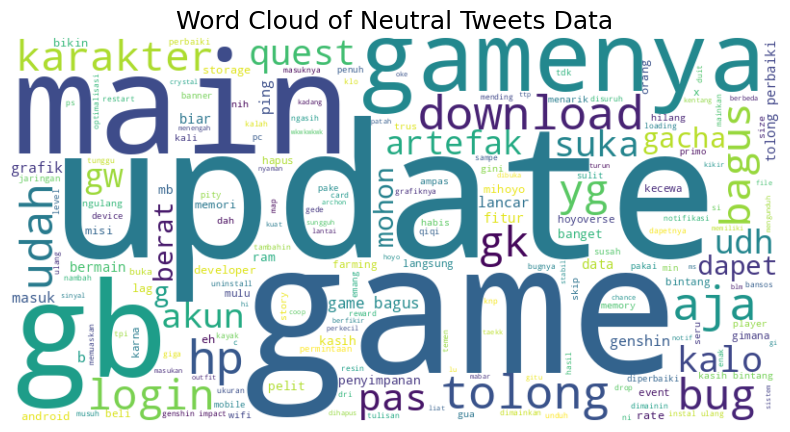

In [ ]:
# Filter teks hanya untuk polaritas 'positive'
neutral_tweets = clean_df[clean_df['polarity'] == 'neutral']['text_stopword']

# Gabungkan semua kata dari tweet positif ke dalam satu string
list_words = ''
for tweet in neutral_tweets:
    for word in tweet:
        list_words += ' ' + word

# Membuat WordCloud khusus untuk teks positif
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis', max_words=200).generate(list_words)

# Visualisasi WordCloud
fig, ax = plt.subplots(figsize=(10, 5))
ax.set_title('Word Cloud of Neutral Tweets Data', fontsize=18)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Tidak menampilkan sumbu
plt.show()

# Data Splitting dan Ekstraksi Fitur dengan TF-IDF

In [ ]:
clean_df["text_akhir"]

,text_akhir
14,hallo samsung tablet close membuka applikasi genshin pdhl memainkannya dg lancar dg versi tertampil layar aplikasi bug hapus memori sdh sy coba kosongkan memori giga tersediaram instal ulang dimainkan halaman hoyoverse aja mohon diperbaiki ganti bintangnya thx tim pengembang
44,suram game nyari arte char aja gadapet sekalinya nemu arte bagus pas upgrade ampas nemu stat bagus aja susah banget mending kalo charnya dikit abyss mesti bawa char bagus kelar
61,game mmorpg terbaik menurutku suka game yg nge build formasi game tu bener cocok banget cerita g nge bosenin grafik ok cm klo penyimpanan hemat update wilayah kasian yg main hp penyimpanan penuh terimakasih cognospheremihoyo
122,tolong developer sehabis update tanah map natlan hitam hitam bikin nyaman main tolong diperbaiki bug bug kasih bintang
147,duh bug si unduh data g selesai selesai download gb habis tunggu sisa gb eh gb tolong perbaikin download data
...,...
53925,selamat review bintang semoga win rate review bintang kali
53927,ngak gamenya
53940,game kikir mending main game sebelah event bansos melimpah mah hadiah anniversary aja interwine fate doang
53970,dah main rilis hadiah eniversery kalah hadiah praregister


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# memisahkan data menjadi fitur (tweet) dan label (sentimen)
X = clean_df['text_akhir']
y = clean_df['polarity']

# ekstraksi fitur dengan TF-IDF
tfidf = TfidfVectorizer(max_features=2000, min_df=5, max_df=0.8, ngram_range=(1, 2))
X_tfidf = tfidf.fit_transform(X)

# untuk konversi hasil ekstraksi fitur menjadi dataframe
features_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf.get_feature_names_out())

# menampilkan hasil ekstraksi fitur
print(features_df)

# bagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

      abbys     abyss   ad  adakan  adil  admin  adventure  air   aj  \
0       0.0  0.000000  0.0     0.0   0.0    0.0        0.0  0.0  0.0   
1       0.0  0.190842  0.0     0.0   0.0    0.0        0.0  0.0  0.0   
2       0.0  0.000000  0.0     0.0   0.0    0.0        0.0  0.0  0.0   
3       0.0  0.000000  0.0     0.0   0.0    0.0        0.0  0.0  0.0   
4       0.0  0.000000  0.0     0.0   0.0    0.0        0.0  0.0  0.0   
...     ...       ...  ...     ...   ...    ...        ...  ...  ...   
2388    0.0  0.000000  0.0     0.0   0.0    0.0        0.0  0.0  0.0   
2389    0.0  0.000000  0.0     0.0   0.0    0.0        0.0  0.0  0.0   
2390    0.0  0.000000  0.0     0.0   0.0    0.0        0.0  0.0  0.0   
2391    0.0  0.000000  0.0     0.0   0.0    0.0        0.0  0.0  0.0   
2392    0.0  0.000000  0.0     0.0   0.0    0.0        0.0  0.0  0.0   

           aja  ...  world  wuwa  yah        yg  yg bagus  yg bikin  yg sulit  \
0     0.089250  ...    0.0   0.0  0.0  0.000000       

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Handling class imbalance
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Menyimpan hasil transformasi fitur untuk evaluasi lebih lanjut
X_train_df = pd.DataFrame(X_train_smote.toarray(), columns=tfidf.get_feature_names_out())
X_test_df = pd.DataFrame(X_test.toarray(), columns=tfidf.get_feature_names_out())

# Membuat model Random Forest
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Melatih model pada data pelatihan
rf_classifier.fit(X_train_smote, y_train_smote)

# Prediksi sentimen pada data pelatihan dan data uji
y_pred_train = rf_classifier.predict(X_train_smote)
y_pred_test = rf_classifier.predict(X_test)

# Evaluasi akurasi model
accuracy_train = accuracy_score(y_train_smote, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)

# Menampilkan akurasi dan laporan klasifikasi
print('Random Forest - accuracy_train:', accuracy_train)
print('Random Forest - accuracy_test:', accuracy_test)
print('Classification Report:\n', classification_report(y_test, y_pred_test))

Random Forest - accuracy_train: 0.9993821439604572
Random Forest - accuracy_test: 0.697286012526096
Classification Report:
               precision    recall  f1-score   support

    negative       0.79      0.75      0.77       280
     neutral       0.42      0.45      0.43        47
    positive       0.64      0.68      0.66       152

    accuracy                           0.70       479
   macro avg       0.61      0.63      0.62       479
weighted avg       0.70      0.70      0.70       479



In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import pandas as pd

# Misalkan X_train, y_train, X_test, dan y_test sudah didefinisikan sebelumnya

# Handling class imbalance
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Menyimpan hasil transformasi fitur untuk evaluasi lebih lanjut
X_train_df = pd.DataFrame(X_train_smote.toarray(), columns=tfidf.get_feature_names_out())
X_test_df = pd.DataFrame(X_test.toarray(), columns=tfidf.get_feature_names_out())

# Membuat model SVM
svm_classifier = SVC(kernel='linear', random_state=42)  # Anda bisa mengganti kernel sesuai kebutuhan

# Melatih model pada data pelatihan
svm_classifier.fit(X_train_smote, y_train_smote)

# Prediksi sentimen pada data pelatihan dan data uji
y_pred_train = svm_classifier.predict(X_train_smote)
y_pred_test = svm_classifier.predict(X_test)

# Evaluasi akurasi model
accuracy_train = accuracy_score(y_train_smote, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)

# Menampilkan akurasi dan laporan klasifikasi
print('SVM - accuracy_train:', accuracy_train)
print('SVM - accuracy_test:', accuracy_test)
print('Classification Report:\n', classification_report(y_test, y_pred_test))

SVM - accuracy_train: 0.9385233240654928
SVM - accuracy_test: 0.7202505219206681
Classification Report:
               precision    recall  f1-score   support

    negative       0.83      0.76      0.80       280
     neutral       0.35      0.47      0.40        47
    positive       0.68      0.72      0.70       152

    accuracy                           0.72       479
   macro avg       0.62      0.65      0.63       479
weighted avg       0.74      0.72      0.73       479



In [ ]:
pip freeze requirements.txt

absl-py==1.4.0
accelerate==1.1.1
aiohappyeyeballs==2.4.4
aiohttp==3.11.10
aiosignal==1.3.1
alabaster==1.0.0
albucore==0.0.19
albumentations==1.4.20
altair==5.5.0
annotated-types==0.7.0
anyio==3.7.1
argon2-cffi==23.1.0
argon2-cffi-bindings==21.2.0
array_record==0.5.1
arviz==0.20.0
astropy==6.1.7
astropy-iers-data==0.2024.12.9.0.36.21
astunparse==1.6.3
async-timeout==4.0.3
atpublic==4.1.0
attrs==24.2.0
audioread==3.0.1
autograd==1.7.0
babel==2.16.0
backcall==0.2.0
beautifulsoup4==4.12.3
bigframes==1.27.0
bigquery-magics==0.4.0
bleach==6.2.0
blinker==1.9.0
blis==0.7.11
blosc2==2.7.1
bokeh==3.6.2
Bottleneck==1.4.2
bqplot==0.12.43
branca==0.8.0
CacheControl==0.14.1
cachetools==5.5.0
catalogue==2.0.10
certifi==2024.8.30
cffi==1.17.1
chardet==5.2.0
charset-normalizer==3.4.0
chex==0.1.87
clarabel==0.9.0
click==8.1.7
cloudpathlib==0.20.0
cloudpickle==3.1.0
cmake==3.30.5
cmdstanpy==1.2.4
colorcet==3.1.0
colorlover==0.3.0
colour==0.1.5
community==1.0.0b1
confection==0.1.5
cons==0.4.6
contourpy==1